## Modulos, bibliotecas e inicializações

In [141]:
import pandas as pd
import sweetviz as sv
import sklearn
from icecream import ic
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
import numpy as np
import warnings
from scipy import signal
import os.path

In [2]:
np.VisibleDeprecationWarning = DeprecationWarning

In [4]:
data_dir = os.path.join('.','aurorabp-sample-data-main/sample')

In [5]:
participants_df = pd.read_csv(os.path.join(data_dir, 'participants.tsv'), sep='\t')
features_df = pd.read_csv(os.path.join(data_dir, 'features.tsv'), sep='\t')
oscillometric_df = pd.read_csv(os.path.join(data_dir, 'measurements_oscillometric.tsv'), sep='\t')
auscultatory_df = pd.read_csv(os.path.join(data_dir, 'measurements_auscultatory.tsv'), sep='\t')

### Separando faixa de dados:

In [136]:
features_df

,pid,phase,measurement,date_time,sbp,dbp,baseline_sbp,baseline_dbp,delta_sbp,delta_dbp,...,delta_dicrotic_notch_height_pressure,delta_dpdt_pressure,delta_ejection_duration_fraction_pressure,delta_ejection_duration_pressure,delta_hr_pressure,delta_quality_pressure,delta_rwat_pressure,delta_sysrise_pressure,delta_invpat_pressure,delta_rpat_pressure
0,o000,ambulatory,measurement 23,2018-01-01 12:17:45,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
1,o000,ambulatory,measurement 25,2018-01-01 12:47:27,141.0,88.0,135.5,93.0,5.5,-5.0,...,-0.142595,-0.646054,0.034060,-0.0325,18.043242,0.166928,-0.035,-0.0350,-0.339737,0.00925
2,o000,ambulatory,measurement 27,2018-01-01 13:17:30,139.0,93.0,135.5,93.0,3.5,0.0,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
3,o000,ambulatory,measurement 28,2018-01-01 13:46:55,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
4,o000,ambulatory,measurement 30,2018-01-01 14:17:10,NaN,NaN,135.5,93.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.753411,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,a005,return,Temporal challenge start 1,2018-01-02 14:38:34,115.0,71.0,110.0,68.0,5.0,3.0,...,0.093355,-0.938597,0.016637,-0.0025,3.002960,0.000000,0.010,0.0675,-0.813435,0.01925
381,a005,return,Temporal challenge start 2,2018-01-02 14:40:13,109.0,71.0,110.0,68.0,-1.0,3.0,...,0.007684,-3.519975,-0.005762,-0.0175,2.754045,0.000000,0.010,-0.0425,-0.500740,0.01125
382,a005,return,Temporal challenge start 3,2018-01-02 14:41:54,121.5,74.0,110.0,68.0,11.5,6.0,...,-0.069275,-4.135001,0.011637,-0.0125,4.640690,0.000000,0.010,0.0125,-0.459383,0.01025
383,a005,synthetic,Calibration average values,NaN,110.0,68.0,110.0,68.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.0000,0.000000,0.00000


In [134]:
participants_df

,pid,n_meas_inlab,n_meas_ambulatory,aurora_size,fitzpatrick_scale,bp_cuff_arm,in_feature_table,age,height,weight,...,coronary_artery_disease,diabetes,arrythmia,previous_heart_attack,previous_stroke,heart_failure,aortic_stenosis,valvular_heart_disease,other_cv_diseases,cvd_meds
0,o000,15,41.0,L,NaN,R,1,33.0,68.0,200.0,...,0,0,0,0,0,0,0,0,0,0
1,o001,15,43.0,M,4.0,L,1,52.0,72.0,171.0,...,0,0,0,0,0,0,0,0,0,0
2,o002,0,47.0,M,NaN,R,0,46.0,62.0,190.0,...,0,1,0,0,0,0,0,0,1,1
3,o003,14,46.0,S,2.0,R,1,43.0,63.0,170.0,...,0,0,0,0,0,0,0,0,0,1
4,o004,14,39.0,S,NaN,R,1,49.0,66.0,154.0,...,0,0,0,0,0,0,0,0,1,1
5,o005,14,40.0,M,NaN,R,1,30.0,71.0,160.0,...,0,0,0,0,0,0,0,0,0,0
6,a000,14,NaN,S,2.0,L,1,56.0,63.0,108.0,...,0,0,0,0,0,0,0,0,0,0
7,a001,11,NaN,S,1.0,L,1,51.0,66.0,125.0,...,0,0,0,0,0,0,0,0,0,0
8,a002,19,NaN,L,2.0,L,1,33.0,74.0,230.0,...,0,0,0,0,0,0,0,0,0,0
9,a003,20,NaN,L,1.0,R,0,78.0,68.0,260.0,...,0,0,1,0,0,0,0,0,0,1


In [135]:
oscillometric_df

,pid,phase,measurement,date_time,sbp,dbp,duration,pressure_quality,optical_quality,waveform_file_path,waveforms_generated
0,o000,initial,Sitting arm down,2018-01-01 11:10:58,138.0,104.0,30.0,1.000,0.431,measurements_oscillometric/o000/o000.initial.S...,1
1,o000,initial,Sitting arm lap,2018-01-01 11:13:10,140.0,92.0,30.0,0.000,0.467,measurements_oscillometric/o000/o000.initial.S...,1
2,o000,initial,Sitting arm up,2018-01-01 11:16:41,138.0,90.0,30.0,0.740,0.471,measurements_oscillometric/o000/o000.initial.S...,1
3,o000,initial,Supine 1,2018-01-01 11:23:10,137.0,96.0,30.0,0.686,0.943,measurements_oscillometric/o000/o000.initial.S...,1
4,o000,initial,Supine 2,2018-01-01 11:24:51,134.0,90.0,30.0,0.821,0.948,measurements_oscillometric/o000/o000.initial.S...,1
...,...,...,...,...,...,...,...,...,...,...,...
303,o005,ambulatory,measurement 76,2018-01-02 15:17:30,119.0,86.0,15.0,0.000,0.861,measurements_oscillometric/o005/o005.ambulator...,1
304,o005,ambulatory,measurement 77,2018-01-02 15:47:33,131.0,83.0,15.0,0.676,0.994,measurements_oscillometric/o005/o005.ambulator...,1
305,o005,return,Signal check,2018-01-02 16:01:15,122.0,76.0,30.0,0.000,0.526,measurements_oscillometric/o005/o005.return.Si...,1
306,o005,return,Sitting arm lap,2018-01-02 16:03:08,116.0,82.0,30.0,0.000,0.904,measurements_oscillometric/o005/o005.return.Si...,1


In [132]:

pid_count = 3
osci_count = 3
sampling_rate = 100
ppt_osci_df = oscillometric_df.loc[oscillometric_df.pid == participants_df.pid[pid_count]]
## carregar dataset do waveform
osci_series = ppt_osci_df.iloc[osci_count]

In [133]:
osci_series

pid                                                                 o003
phase                                                            initial
measurement                                                     Supine 1
date_time                                            2018-01-01 09:40:19
sbp                                                                131.0
dbp                                                                 78.0
duration                                                            30.0
pressure_quality                                                     1.0
optical_quality                                                     0.99
waveform_file_path     measurements_oscillometric/o003/o003.initial.S...
waveforms_generated                                                    1
Name: 146, dtype: object

In [8]:
waveform_df = pd.read_csv(os.path.join(data_dir, osci_series.waveform_file_path), delimiter = '\t')

In [9]:
waveform_df

,t,ekg,optical,pressure,accel_x,accel_y,accel_z
0,0.000,127.00,-314880.0,2971.8,0.083936,-0.31427,0.97942
1,0.002,126.99,-314890.0,2971.6,0.085205,-0.31427,0.97903
2,0.004,126.95,-314890.0,2971.4,0.086474,-0.31427,0.97864
3,0.006,126.89,-314890.0,2971.1,0.087742,-0.31427,0.97824
4,0.008,126.91,-314890.0,2970.9,0.089011,-0.31427,0.97785
...,...,...,...,...,...,...,...
14995,29.990,125.32,-312610.0,2976.5,0.057096,-0.36014,0.95306
14996,29.992,125.27,-312610.0,2976.0,0.056608,-0.36034,0.95189
14997,29.994,125.18,-312600.0,2975.4,0.056120,-0.36053,0.95072
14998,29.996,125.19,-312590.0,2974.9,0.055632,-0.36073,0.94955


In [10]:
t = waveform_df['t']
ekg = waveform_df['ekg']
optical = waveform_df['optical']
pressure = waveform_df['pressure']
accelX = waveform_df['accel_x']
accelY = waveform_df['accel_y']
accelZ = waveform_df['accel_z']

# Análise visual 

In [164]:
FS = 500
def _bandpass_filter(data: np.ndarray, hp: float, lp: float, fs: float = FS) -> np.ndarray:
    order = 4
    b, a = signal.butter(order, (hp, lp), btype='bandpass', fs=fs)
    return signal.lfilter(b, a, data-data[0])

In [183]:
def extremos_na_faixa(df, feature, tempo_col='t', inicio=0, fim=0):
    dados_filtrados = _bandpass_filter(df[feature].to_numpy(), 0.25, 60)
    
    df_filtrado = df.copy()
    df_filtrado[feature] = dados_filtrados


    faixa_df = df_filtrado[(df_filtrado[tempo_col] >= inicio) & (df_filtrado[tempo_col] <= fim)]

    max_linha = faixa_df.loc[faixa_df[feature].idxmax()]
    min_linha = faixa_df.loc[faixa_df[feature].idxmin()]

    print(f"Máximo de {feature}: {max_linha[feature]} em t = {max_linha[tempo_col]}")
    print(f"Mínimo de {feature}: {min_linha[feature]} em t = {min_linha[tempo_col]}")
    
    return max_linha, min_linha

In [168]:
def buscar(df, feature, tempo=None, valor=None, tempo_col='t', aplicar_filtro=True):

    if aplicar_filtro:
        dados_filtrados = _bandpass_filter(df[feature].to_numpy(), 0.5, 20)
        df = df.copy()
        df[feature] = dados_filtrados

    if tempo is not None:
        linha = df.iloc[(df[tempo_col] - tempo).abs().argmin()]
        print(f"Tempo mais próximo: {linha[tempo_col]} - Valor filtrado de {feature}: {linha[feature]:.2f}")
        return linha[feature]

    elif valor is not None:
        linha = df.iloc[(df[feature] - valor).abs().abs().argmin()]
        print(f"Valor mais próximo: {linha[feature]:.2f} - Tempo correspondente: {linha[tempo_col]}")
        return linha[tempo_col]

    else:
        return -1


#### EKG

Text(0, 0.5, 'EKG')

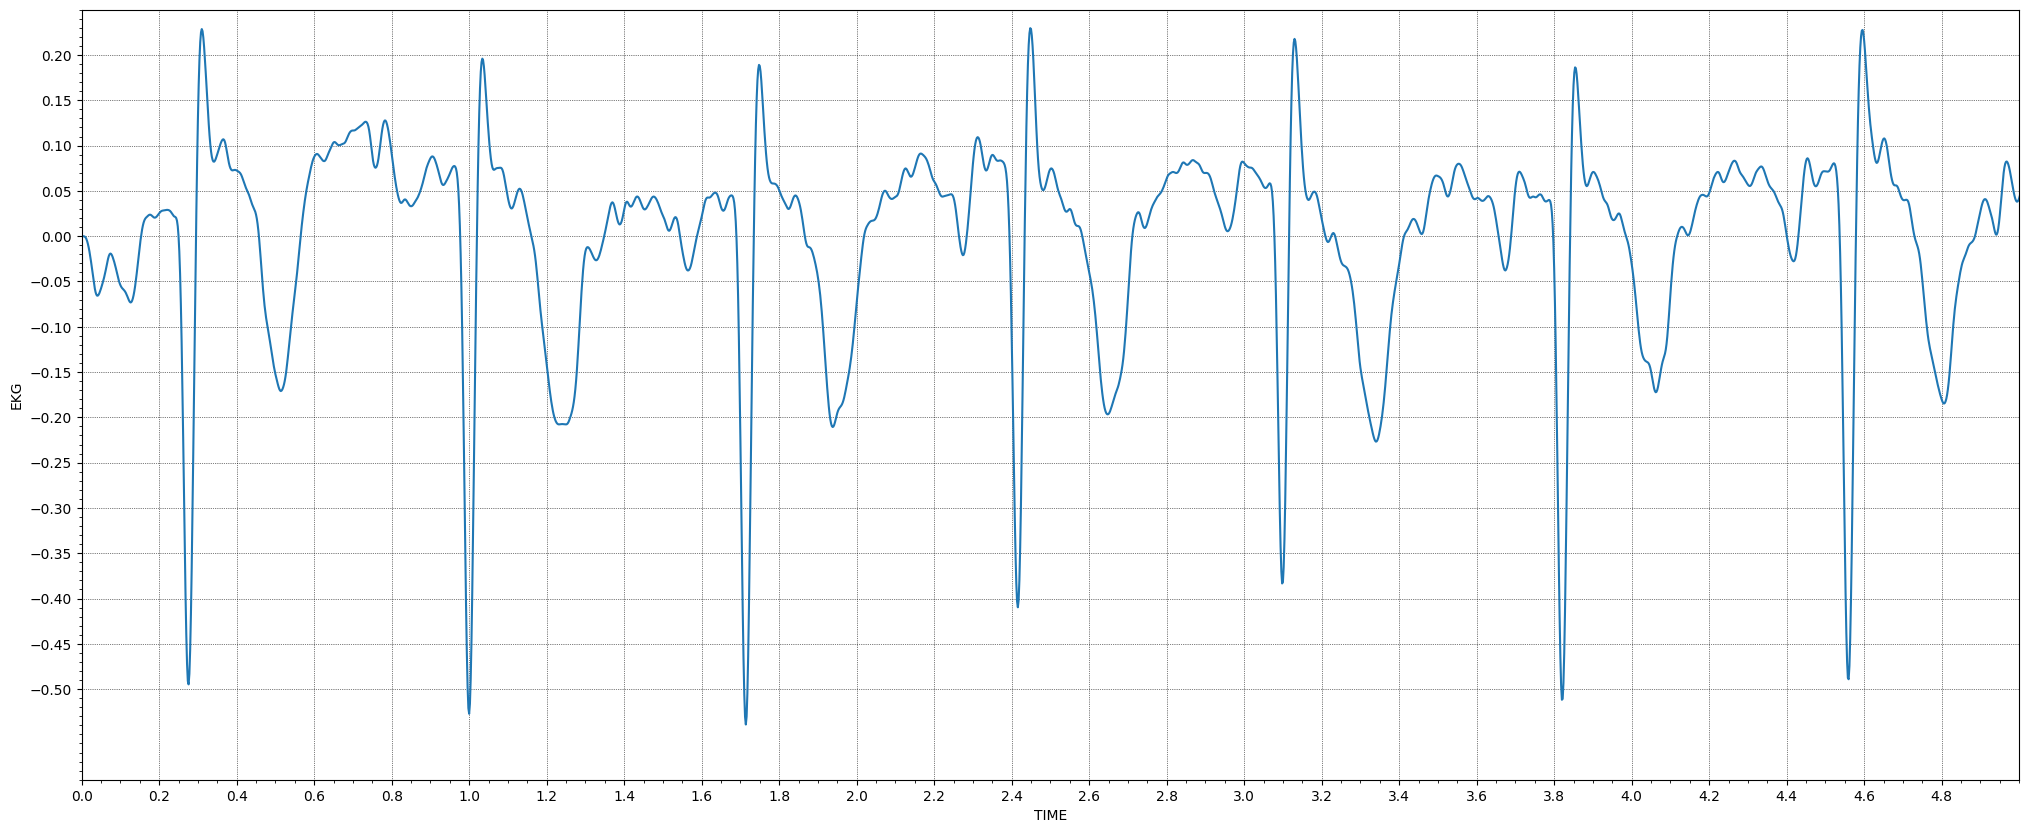

In [169]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, _bandpass_filter(ekg.to_numpy(), 0.5, 20))

axs.set_xlim(0, 5)
axs.set_ylim(-0.6, 0.25)
axs.set_yticks(np.arange(-0.5, 0.25, 0.05));
axs.set_xticks(np.arange(0, 5, 0.2));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.5, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("EKG")



In [171]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'ekg', inicio=0.0, fim=4)


Máximo de ekg: 0.23 em t = 2.448
Mínimo de ekg: -0.54 em t = 1.714


#### PRESSURE

Text(0, 0.5, 'PRESSURE')

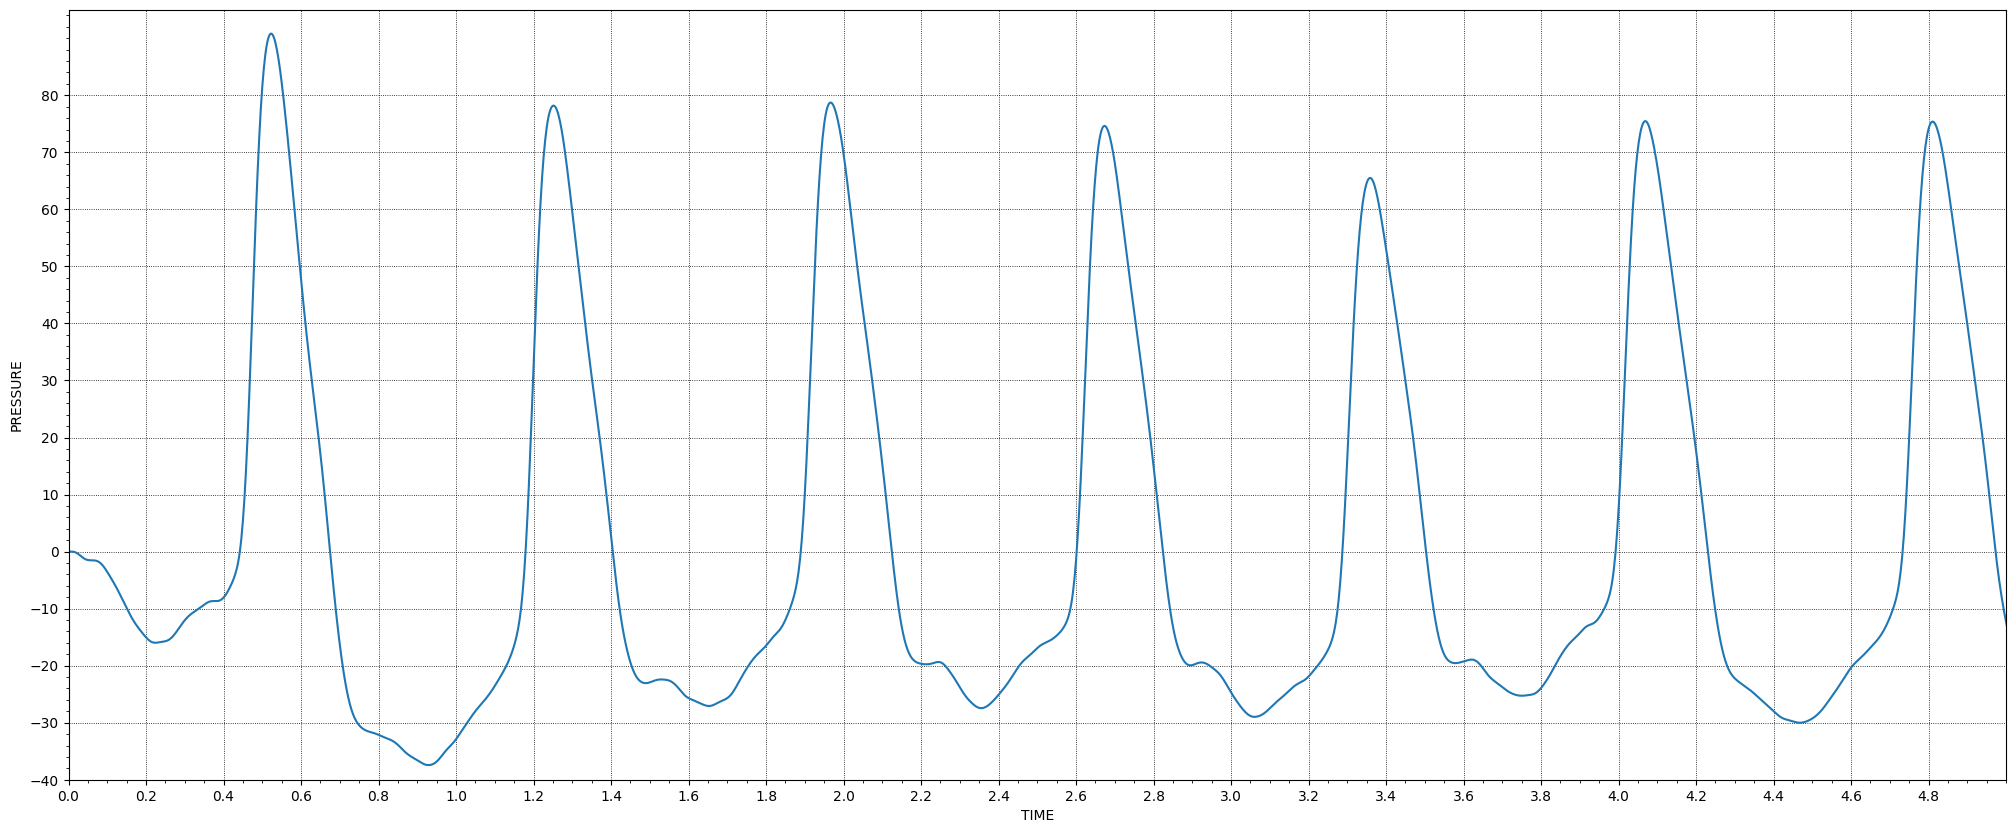

In [172]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, _bandpass_filter(pressure.to_numpy(), 0.5, 20))

axs.set_xlim(0, 5)
axs.set_ylim(-40, 95)
axs.set_yticks(np.arange(-40, 85, 10));
axs.set_xticks(np.arange(0, 5, 0.2));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("PRESSURE")

In [173]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'pressure', inicio=0.0, fim=5)

Máximo de pressure: 90.81 em t = 0.522
Mínimo de pressure: -37.43 em t = 0.928


#### PPG / OPTICAL

Text(0, 0.5, 'OPTICAL')

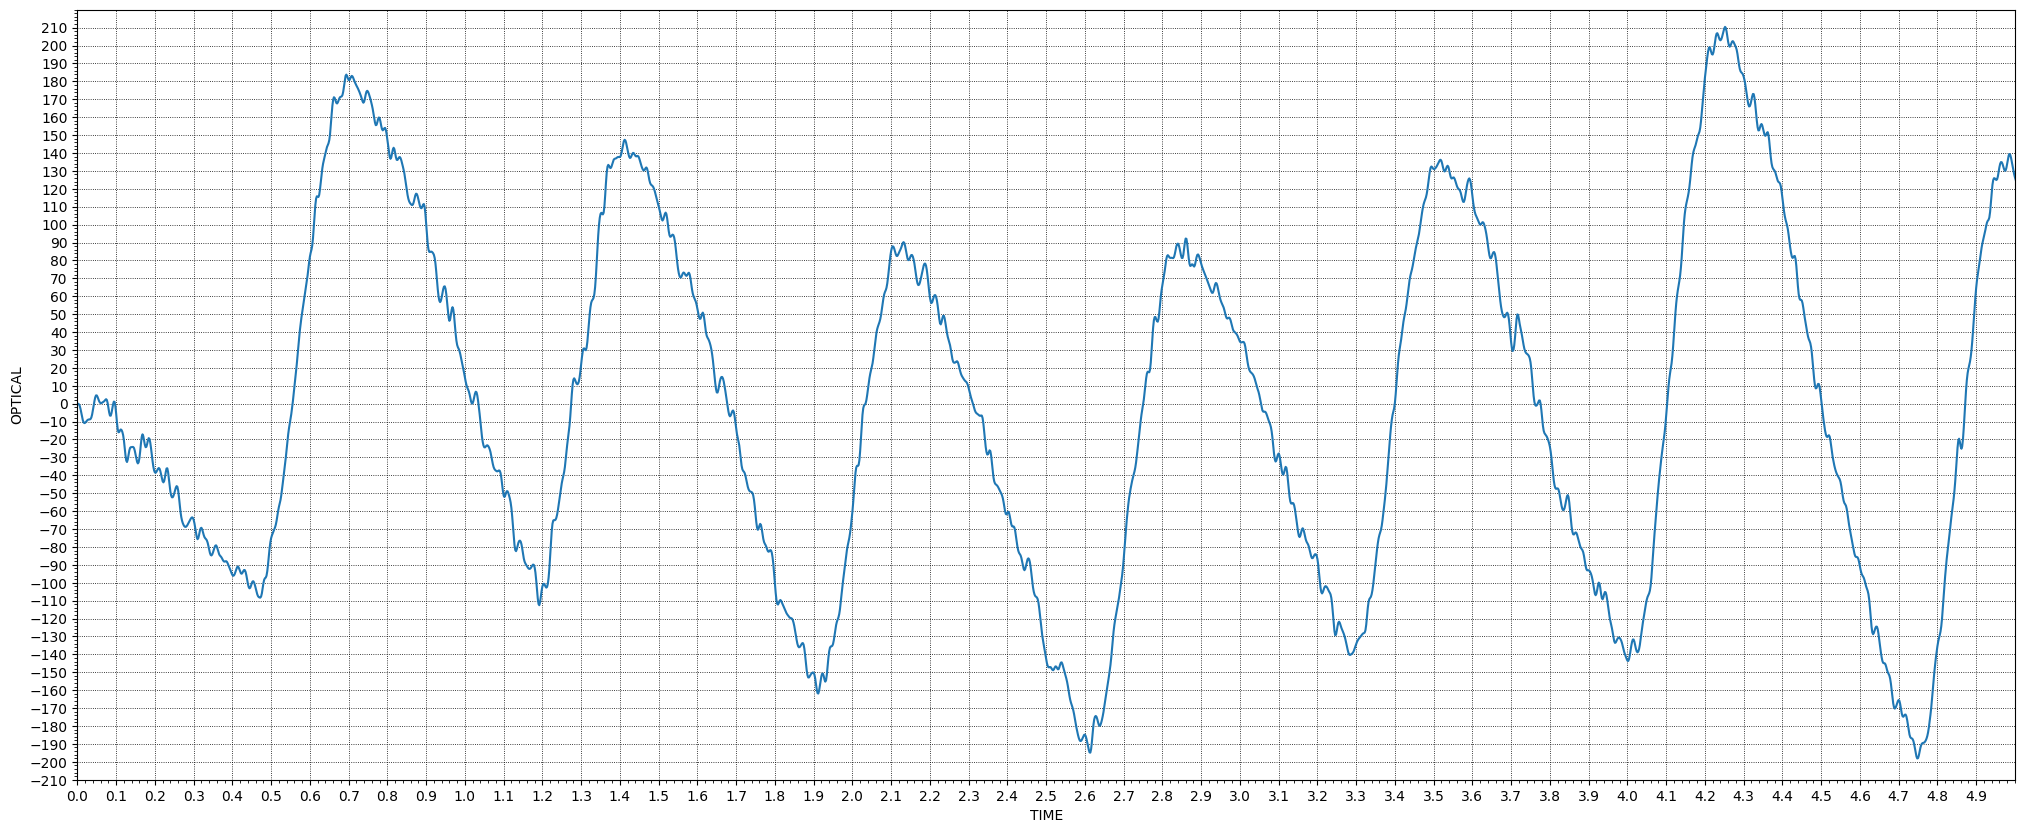

In [185]:
fig, axs = plt.subplots(1,1, figsize=(25, 10))
axs.plot(t, _bandpass_filter(waveform_df.optical.to_numpy(), 0.25, 50))
axs.set_xlim(0, 5)
axs.set_ylim(-210, 220)
axs.set_yticks(np.arange(-210, 220, 10));
axs.set_xticks(np.arange(0.00, 5, 0.1));

#adicionando grades
axs.minorticks_on()
axs.grid(True, which='major' , color='black', linestyle=':', linewidth=0.6, axis='both')         

axs.set_xlabel("TIME")
axs.set_ylabel("OPTICAL")

In [186]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'optical', inicio=0.0, fim=5)

Máximo de optical: 210.56749505586157 em t = 4.25
Mínimo de optical: -198.76879875310973 em t = 4.746


#### ACELERAÇÃO DOS EIXOS NA TONOMETRIA

#####

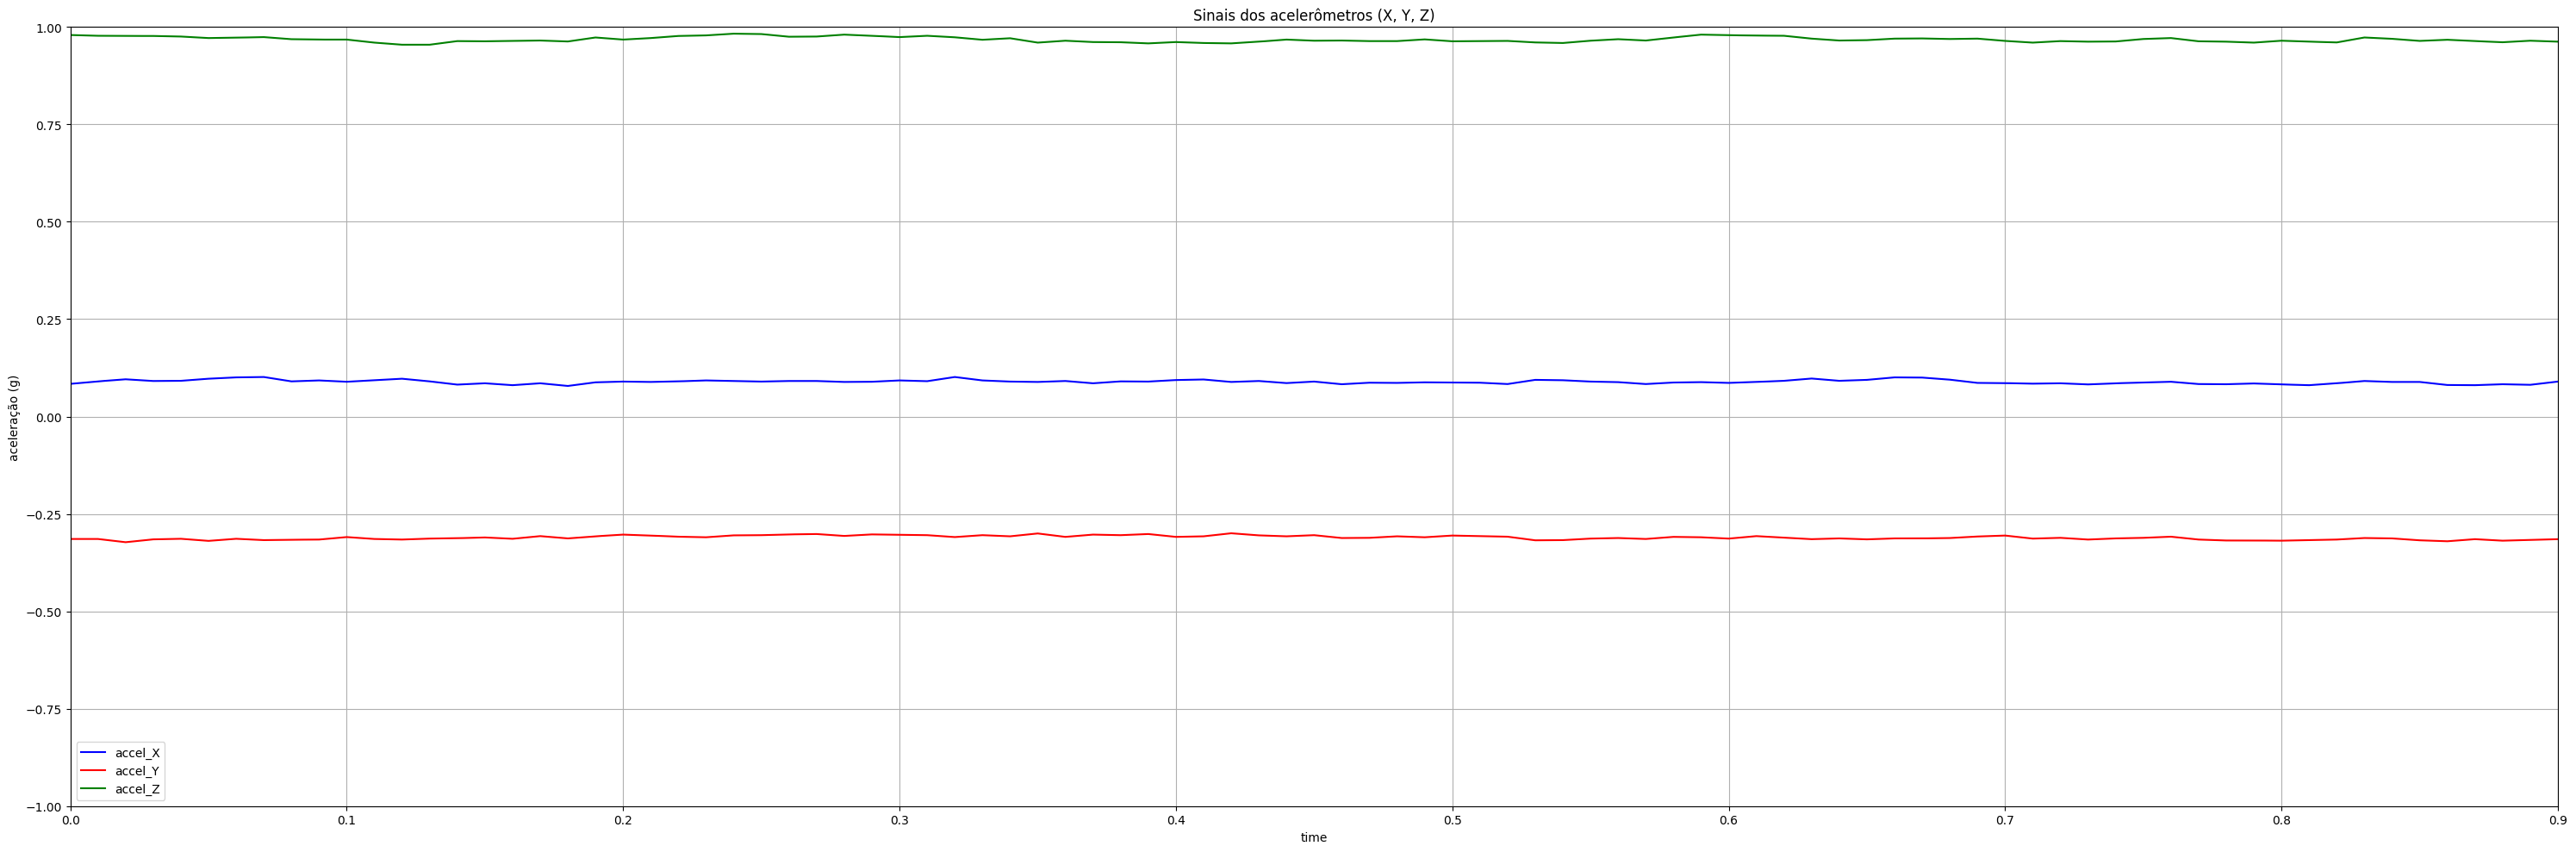

In [46]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(30, 10))

ax.plot(t, accelX, label='accel_X', color='blue')
ax.plot(t, accelY, label='accel_Y', color='red')
ax.plot(t, accelZ, label='accel_Z', color='green')

ax.set_xlim(0, 0.05)
ax.set_ylim(-1, 1)
ax.set_xticks(np.arange(0.00, 1, 0.1))

ax.set_xlabel("time")
ax.set_ylabel("aceleração (g)")
ax.set_title("Sinais dos acelerômetros (X, Y, Z)")

# Grid e legenda
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()


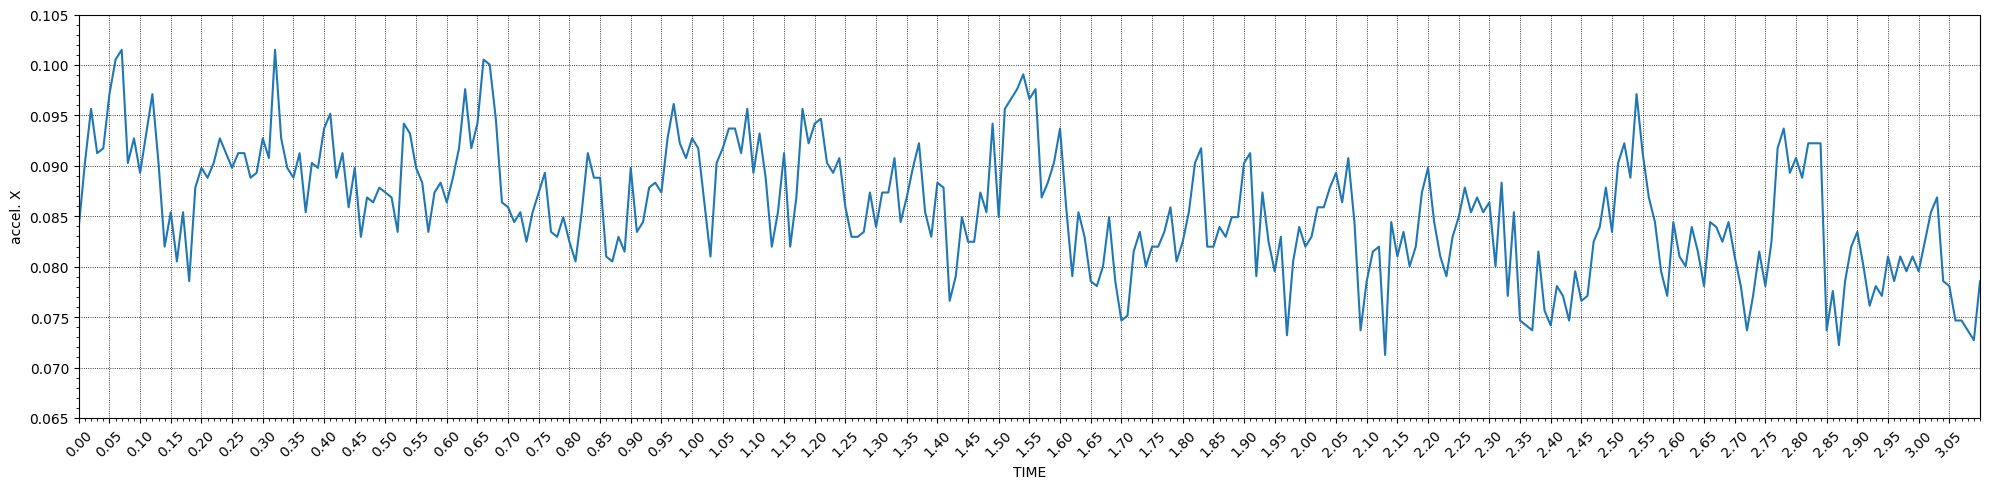

In [187]:
#-----------------------------------------EIXO X
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelX)
axs.set_xlim(0, 3.1)
axs.set_ylim(0.065, 0.105)
axs.set_xticks(np.arange(0, 3.1, 0.05));
axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. X")

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)

In [188]:
max_faixa, min_faixa = extremos_na_faixa(waveform_df, 'accel_x', inicio=0, fim=3.1)

Máximo de accel_x: 0.016517631096301073 em t = 2.548
Mínimo de accel_x: -0.011184533359260458 em t = 1.43


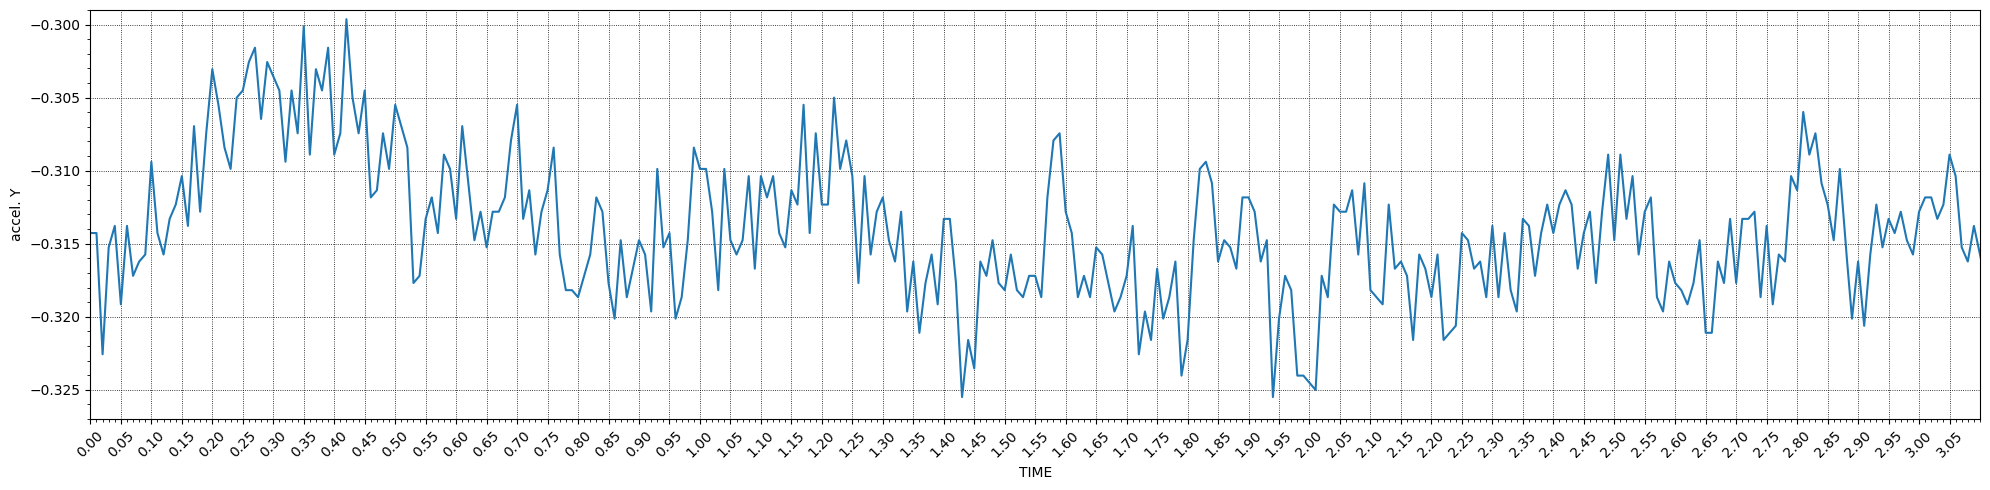

In [70]:
#-----------------------------------------EIXO Y
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelY)
axs.set_xlim(0, 3.1)
axs.set_ylim(-0.327, -0.299)
axs.set_xticks(np.arange(0, 3.1, 0.05));
axs.tick_params('x', labelrotation=45)
axs.set_xlabel("TIME")
axs.set_ylabel("accel. Y")

axs.minorticks_on()
axs.grid(True, which = 'major', axis = 'both', color = 'black', linestyle=':', linewidth=0.6)

plt.tight_layout(w_pad = 0.02)

In [72]:
max_faixa, min_faixa = extremos_na_faixa(waveform_df, 'accel_y', inicio=0, fim=3.1)

Maximo de accel_y: -0.29963 em t = 0.42
Minimo de accel_y: -0.3255 em t = 1.43


Text(0, 0.5, 'ACCEL Z')

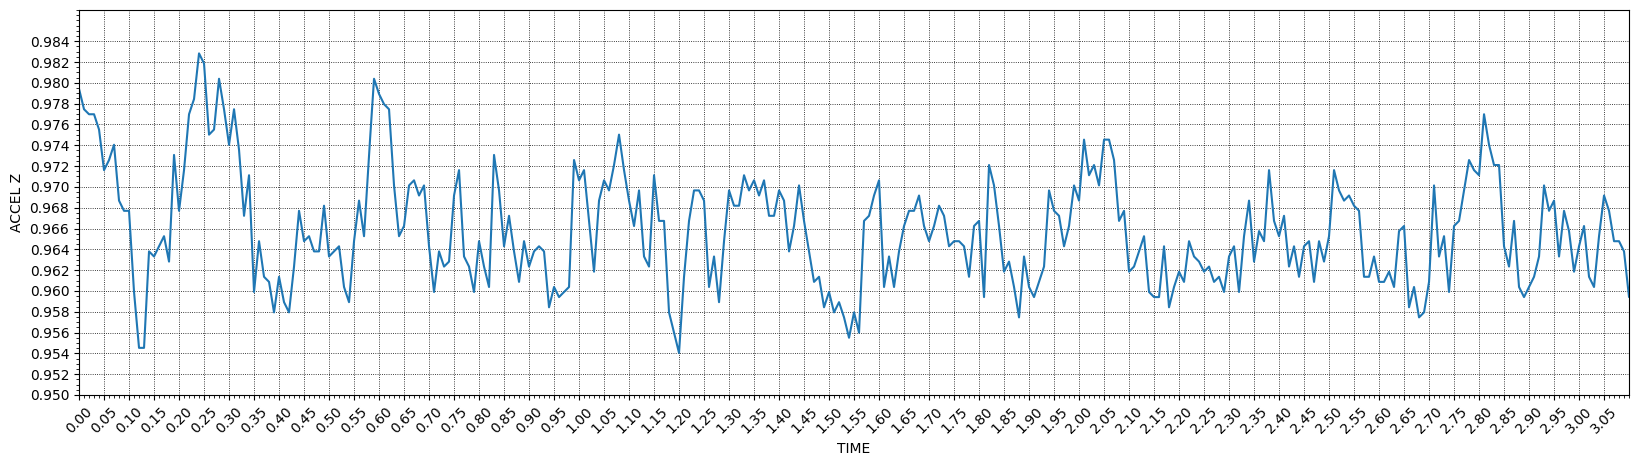

In [100]:
#-------------------------------------------------EIXO Z
fig, axs = plt.subplots(1, 1, figsize=(20,5))
axs.plot(t, accelZ)
axs.set_xlim(0, 3.1)
axs.set_ylim(0.952, 0.987)

axs.set_xticks(np.arange(0, 3.1, 0.05))
axs.set_yticks(np.arange(0.950, 0.985, 0.002))
axs.tick_params('x', labelrotation=45)
axs.minorticks_on()
axs.grid(True, which='major', axis='both', color ='black', linestyle=':', linewidth=0.6)

axs.set_xlabel("TIME")
axs.set_ylabel("ACCEL Z")


In [89]:
max_linha, min_linha = extremos_na_faixa(waveform_df, 'accel_z', inicio=0.0, fim=3.1)

Maximo de accel_z: 0.98283 em t = 0.24
Minimo de accel_z: 0.95404 em t = 1.2


In [101]:
valor = buscar(waveform_df, 'accel_z', tempo = 0)

Tempo: 0.0 - Valor accel_z: 0.97942


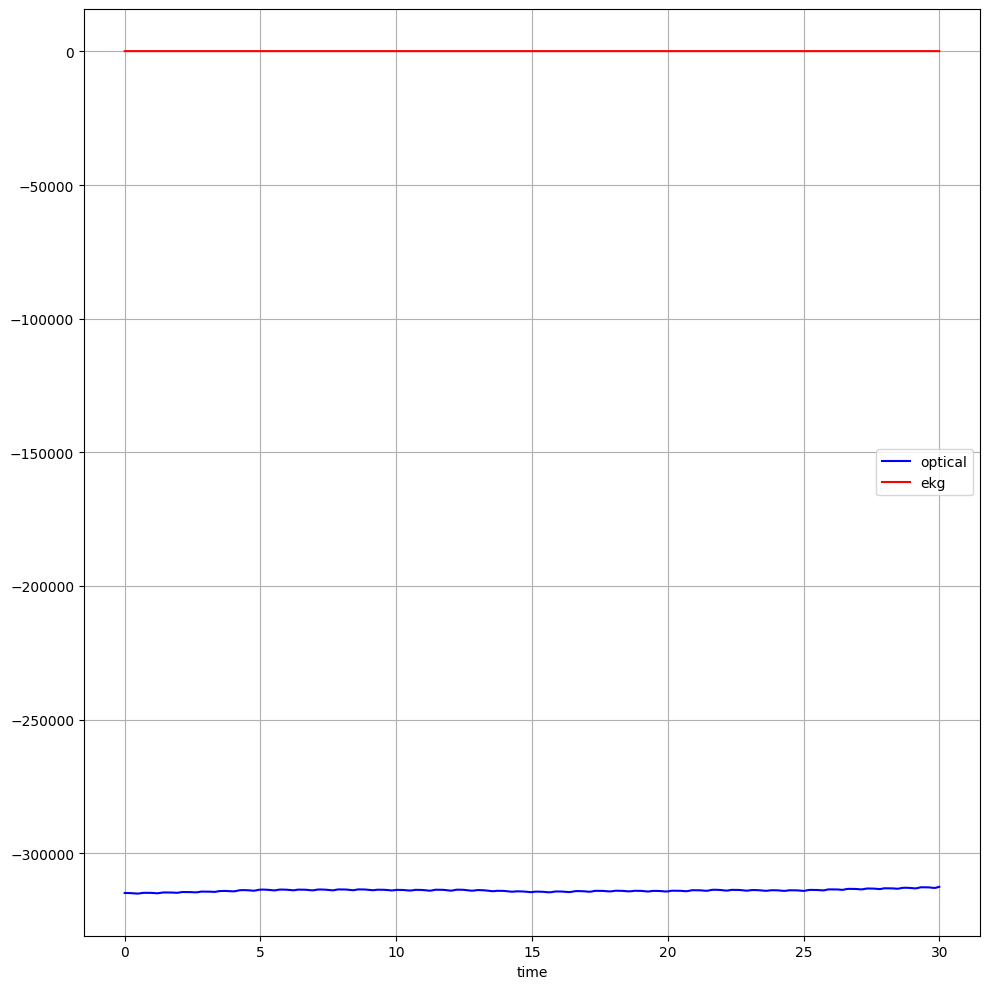

In [139]:

fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(t, optical, label='optical', color='blue')
ax.plot(t, ekg, label='ekg', color='red')

#ax.set_xlim(0, 0.05)
#ax.set_ylim(-1, 1)
#ax.set_xticks(np.arange(0.00, 1, 0.1))

ax.set_xlabel("time")

# Grid e legenda
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()
